# Statistical Modeling

## Red Wine Quality

* Analyse the Red Wine Quality dataset.
* Apply all that you have learned about Machine Learning to complete this task.

Objectives for this Part:
* Practice working with CSV files.
* Practice performing EDA.
* Practice applying statistical inference procedures.
* Practice using linear machine learning models.
* Practice visualizing data with Matplotlib & Seaborn.
* Practice creating dashboards with Google Data Studio.
* Practice reading data, performing queries and filtering data using Pandas.

provided dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

* Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
* Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
* Apply linear machine learning models to predict the quality column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
* Apply linear machine learning models to predict the alcohol column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.

## 1. Import needed libraries:

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [26]:
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    f1_score,
    recall_score,
    precision_score,
)

import statsmodels.api as sm

<IPython.core.display.Javascript object>

## 2. Data Information
Given dataset has these features:
* fixed acidity: :most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

* volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

* citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines.

* residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

* chlorides: the amount of salt in the wine.

* free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

* total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

* density: the density of wine is close to that of water depending on the percent alcohol and sugar content.

* pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

* sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

* alcohol: the percent alcohol content of the wine.

* quality: output variable (based on sensory data, score between 0 and 10).

In [4]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<IPython.core.display.Javascript object>

In [5]:
df.shape

(1599, 12)

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<IPython.core.display.Javascript object>

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<IPython.core.display.Javascript object>

* This dataset is focused on red wine only;
* There are no missing values;
* There are 1599 records and 12 features.
* As we focus on wine quality - the ratings are given from 3 to 8. Most wines are given 5-6 ratings. 

* Lets see how our dataset is displayed in below histogram:

We see that our data is clearly skewed and that information will be needed further for making our ML model.

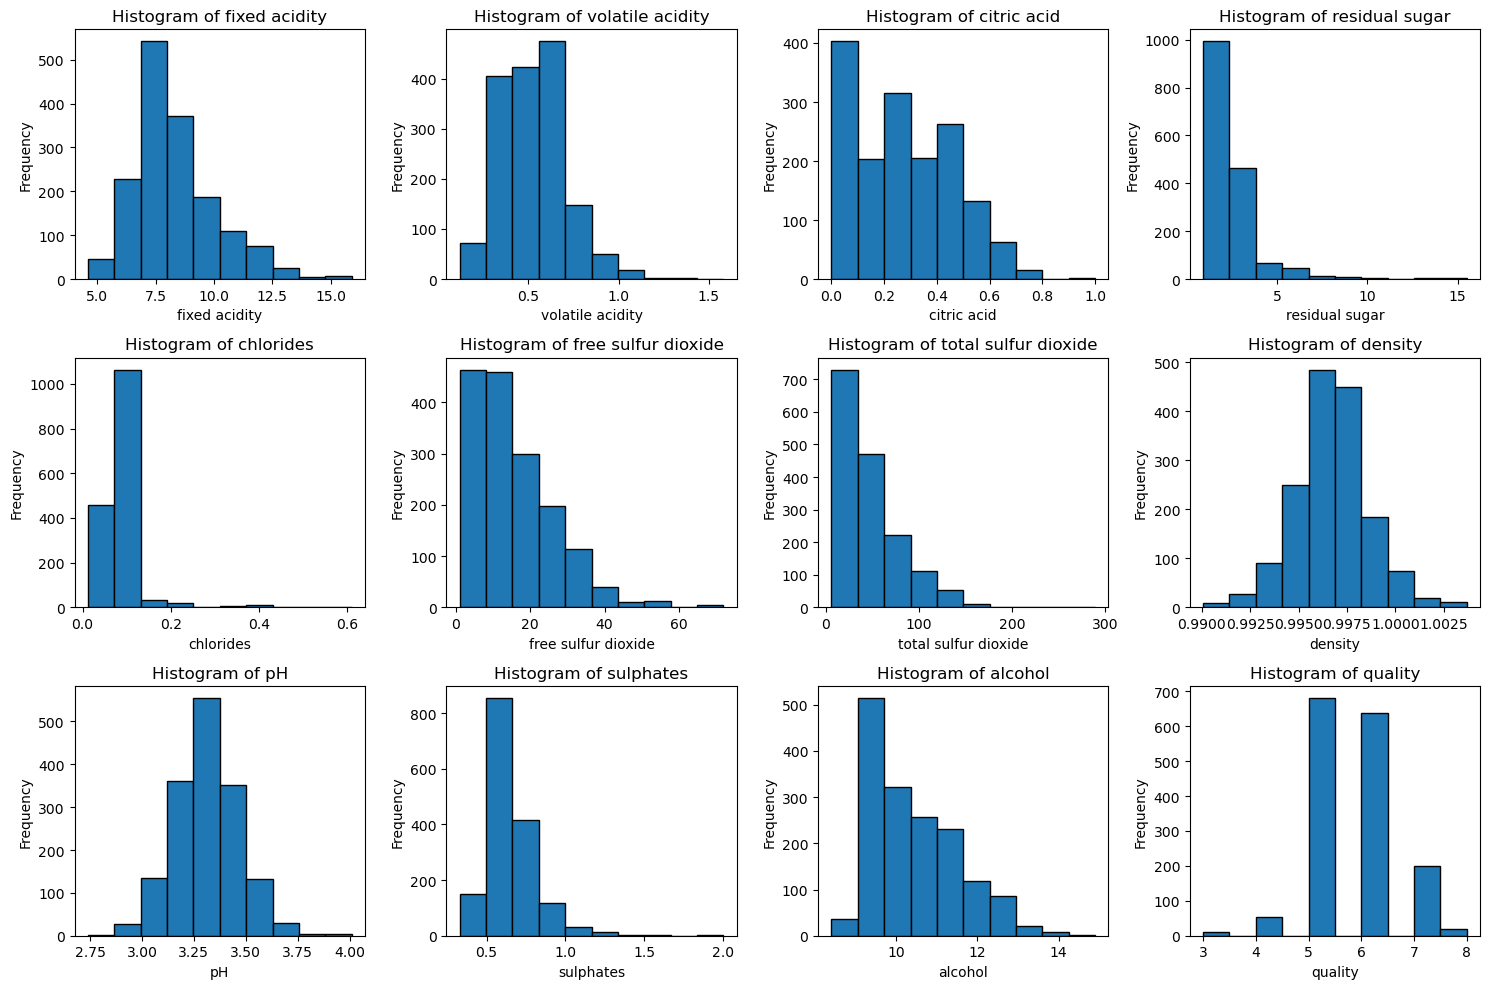

<IPython.core.display.Javascript object>

In [9]:
# Iterate over each column and create a histogram
column_names = df.columns
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, column in enumerate(column_names):
    row = i // 4
    col = i % 4

    axes[row, col].hist(df[column], bins=10, edgecolor="black")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].set_title(f"Histogram of {column}")

plt.tight_layout()
plt.show()

* Let's check the outliers in our dataset in bellow provided barplots.
As we see the barplots detect quite an amount of outliers. But it could be also not true, because we have histograms that proves that data is skewed and that could be mistaken as outlier:

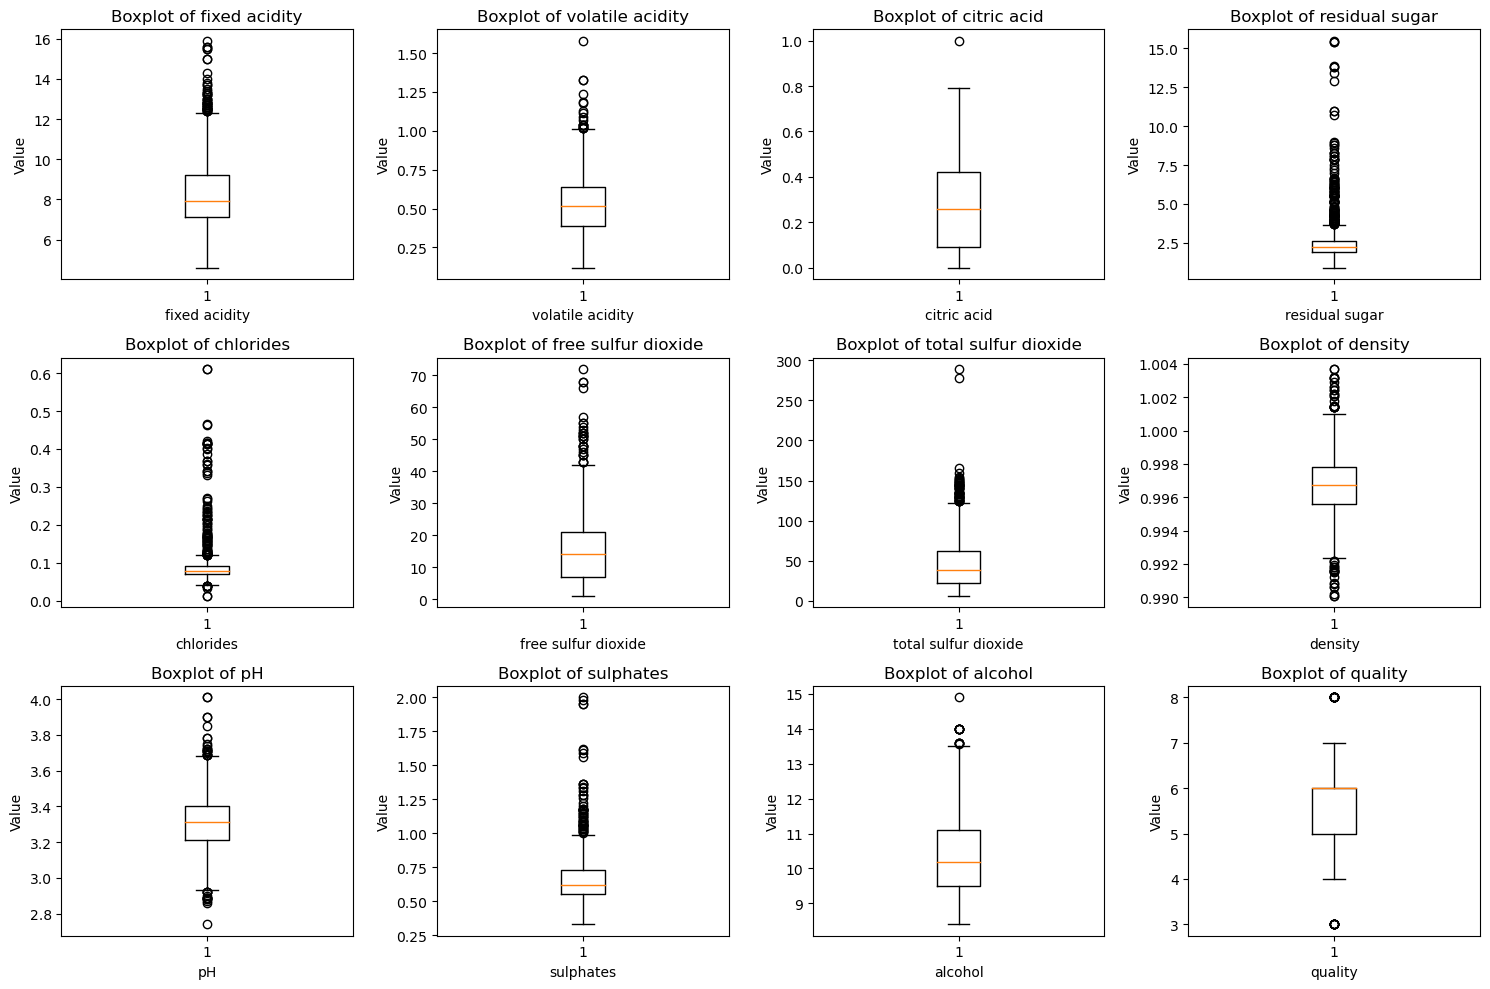

<IPython.core.display.Javascript object>

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Iterate over each column and create a boxplot in the corresponding subplot
for i, column in enumerate(column_names):
    row = i // 4
    col = i % 4

    axes[row, col].boxplot(df[column])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Value")
    axes[row, col].set_title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

* Let's start visualizing the different quality values and how many wines have that rating in our dataset:


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


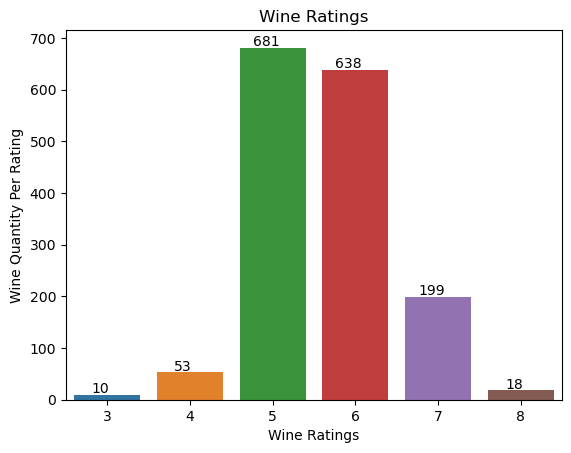

<IPython.core.display.Javascript object>

In [11]:
print(df["quality"].value_counts())
ax = sns.countplot(x=df["quality"])
for i in ax.patches:
    ax.annotate(
        f"{i.get_height():.0f}",
        (i.get_x() + i.get_width() / 2.5, i.get_height()),
        ha="center",
        va="center",
        xytext=(0, 6),
        textcoords="offset pixels",
    )
plt.xlabel("Wine Ratings")
plt.ylabel("Wine Quantity Per Rating")
plt.title("Wine Ratings")
plt.show()

* We see that majority of wines get 5 and 6 ratings. Since our goal is to find out what features must the best wine have, I will concentrate more on 7and 8 star rated wines. 

* Calculate and order correlations based on wine quality: (negative correalations are as valuable as positive, therefore we sort them to see their strengh)

* **Standard:** On the right side of correlation map, you can see a scale ranging from -1 to +1. <br>
** -1 denotes the variables that have the negative correlation, but equally strong as +1 correlation;<br>
** the values above 0.0 denote the variables with a positive correlation.

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


<AxesSubplot: >

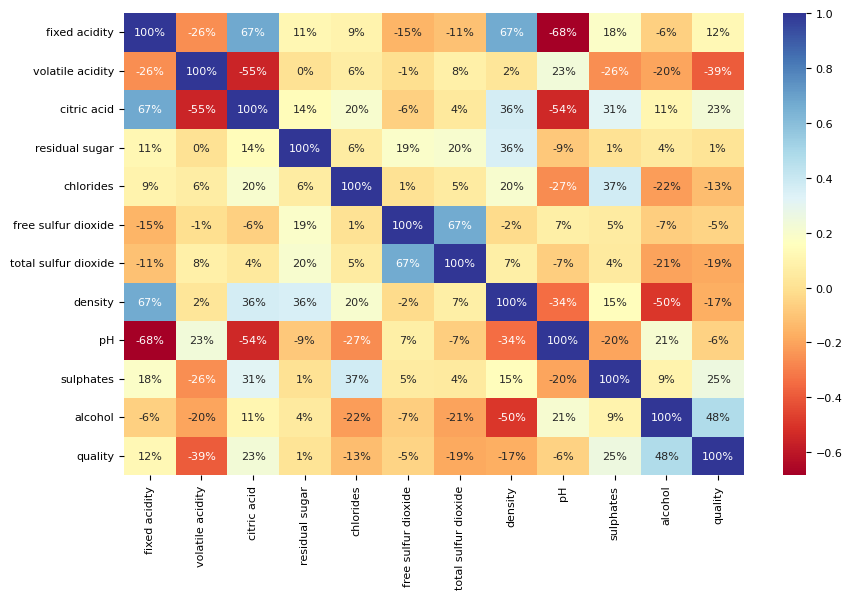

<IPython.core.display.Javascript object>

In [45]:
# sorting correlations in their absolute value.
correlations = df.corr()["quality"].abs().sort_values(ascending=False)
print(correlations)
# Heatmap to plot all correlations between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".0%", cmap="RdYlBu")

From this matrix we can observe, apart from the information we had before, some feature negative correlations such as density and volatile acidity. Negative correlations are as important as positive correlations. Apart from that, we get to know the percentage of the correlations we obtained before. We can also observe that approximately half of these features correlate positively with quality while the other half correlate negatively.

From all the values, we are selecting alcohol, sulphates, citric acid and volatile acidity in order to study them better and see the distribution of values that separate the different qualities.

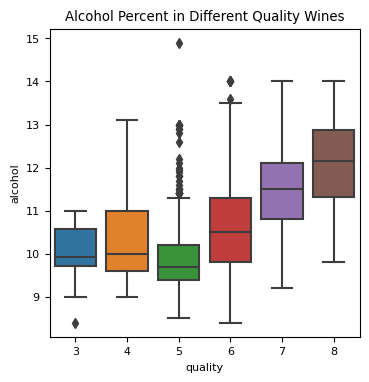

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(4, 4))
df_alco = sns.boxplot(x="quality", y="alcohol", data=df)
df_alco.set(title="Alcohol Percent in Different Quality Wines")

On this boxplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with rating 5 or 6 are presenting some strange values. Let's do some further investigation now:

In order to see why we do have these different values, we are going to select a subset of the dataset which will only contain rows whose quality column value is 5 or 6, and we will calculate correlation coefficients for this subset.

In [48]:
df_quality_five_six = df.loc[(df["quality"] >= 5) & (df["quality"] <= 6)]
df_quality_five_six[
    "quality"
].value_counts()  # result to check if we have enough size to provide correlation

5    681
6    638
Name: quality, dtype: int64

<IPython.core.display.Javascript object>

In [49]:
correlations_subset = (
    df_quality_five_six.corr()["quality"].abs().sort_values(ascending=False)
)
print(correlations_subset)

quality                 1.000000
alcohol                 0.375224
total sulfur dioxide    0.239067
volatile acidity        0.237193
sulphates               0.162405
density                 0.134559
chlorides               0.081813
citric acid             0.080146
free sulfur dioxide     0.060618
fixed acidity           0.053447
pH                      0.043065
residual sugar          0.018452
Name: quality, dtype: float64


<IPython.core.display.Javascript object>

* When examining the correlation of lower-rated wines with alcohol, it is clear that wines with a lower alcohol content are classified as being of lower quality.

### What should be the alcohol concentration of higher quality wines?

* The database under study is Portuguese "Vinho Verde" wine, which does not represent all the world's red wines, but on the basis of this database we can make assumptions and apply the results obtained to the evaluation of red wine quality parameters.
* As some experts share that red wine alcohol quantity is 12 - 15 percent, we can check this with our data.
* Hypothesis: is the average alcohol quantity equal to quality groups (compare 5-6 ratings and 7-8 ratings) or if they differ is it statistically significant?
* To construct confidence intervals and set significance levels, we need to determine the level of confidence and significance we desire. Let's assume a confidence level of 95% and a significance level of alpha = 5% for the following examples.

Null hypothesis (H0): average alcohol quantity in quality (5-6) =  average alcohol quantity in quality (7-8)<br>
Alternative hypothesis (HA): average alcohol quantity in quality (5-6) !=  average alcohol quantity in quality (7-8)

In [63]:
# create 2 groups of medium (5-6) ratings and best wine (7-8) ratings:
medium_wine = df.loc[(df["quality"] >= 5) & (df["quality"] <= 6)]
best_wine = df[df["quality"] >= 7]

t, p = stats.ttest_ind(medium_wine["alcohol"], best_wine["alcohol"], equal_var=False)
alpha = 0.05

print("t-value:", t)
print("p-value:", p)

if p < alpha:
    print(
        "Reject null hypothesis: there is a significant difference between average alcohol quantity in medium rated wine and best rated wine"
    )
else:
    print(
        "Fail to reject null hypothesis: there is no significant difference between average alcohol quantity in medium rated wine and best rated wine"
    )
result = round(medium_wine["alcohol"].mean() - best_wine["alcohol"].mean(), 3)
print("The difference between medium rated wine and best rated wine: ", result)
if result < 0:
    print(f"7-8 rated wine has: {result} higher alcohol quantity")
else:
    print(f"5-6 rated wine has: {result} higher alcohol quantity")

t-value: -17.367413459406908
p-value: 1.0594276720931997e-46
Reject null hypothesis: there is a significant difference between average alcohol quantity in medium rated wine and best rated wine
The difference between medium rated wine and best rated wine:  -1.265
7-8 rated wine has: -1.265 higher alcohol quantity


<IPython.core.display.Javascript object>

* The mean difference between both groups of wine is a clear evidence that alcohol quantity is meaningful feature for quality.

* What is the confidence interval for alcohol quantity for red wine when it is rated above 7?<br>
(using bootstrap technique due to a small sample size)

In [65]:
best_wines = df[df["quality"] >= 7]
alcohol_quantity = best_wines["alcohol"].values
n_iterations = 1000

confidence_level = 0.95

# Initialize an array to store bootstrap sample means
bootstrap_means = np.zeros(n_iterations)

for i in range(n_iterations):
    bootstrap_sample = np.random.choice(
        alcohol_quantity, size=len(alcohol_quantity), replace=True
    )
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculate the confidence interval
lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) * 100 / 2)
upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) * 100 / 2)

# Print the confidence interval
print("Confidence Interval for Alcohol Quantity (Best Quality Wines):")
print(f"Lower Bound: {lower_bound:.3f}")
print(f"Upper Bound: {upper_bound:.3f}")

Confidence Interval for Alcohol Quantity (Best Quality Wines):
Lower Bound: 11.384
Upper Bound: 11.639


<IPython.core.display.Javascript object>

* Based on our founded alcohol quantity confidence interval lets see alcohol quantity in our dataset:

In [68]:
print("Alcohol quantity mean in dataset: ", round(df["alcohol"].mean(), 2))
print(
    "Alcohol quantity mean in medium rated wine: ",
    round(medium_wine["alcohol"].mean(), 2),
)
print(
    "Alcohol quantity mean in best rated wine: ", round(best_wine["alcohol"].mean(), 2)
)

Alcohol quantity mean in dataset:  10.42
Alcohol quantity mean in medium rated wine:  10.25
Alcohol quantity mean in best rated wine:  11.52


<IPython.core.display.Javascript object>

* Let's check other features that where signifficant it our correlation and how they change based on quality ratings:

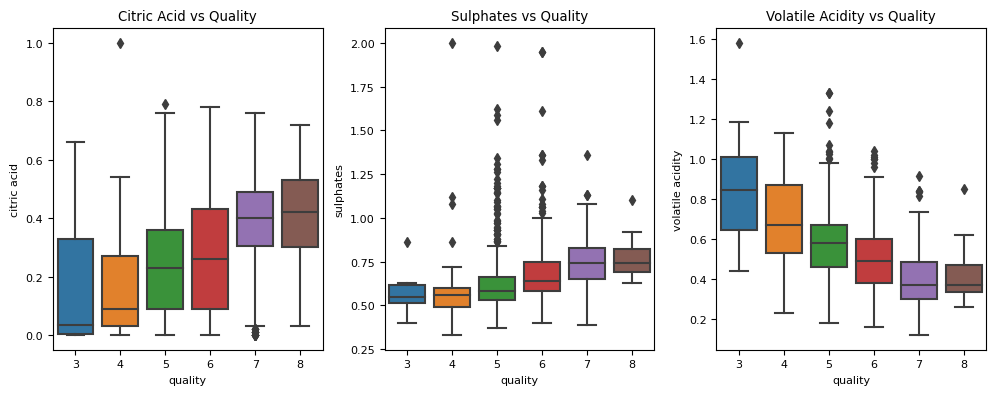

<IPython.core.display.Javascript object>

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
sns.boxplot(x="quality", y="citric acid", data=df, ax=axes[0])
axes[0].set_title("Citric Acid vs Quality")

sns.boxplot(x="quality", y="sulphates", data=df, ax=axes[1])
axes[1].set_title("Sulphates vs Quality")

sns.boxplot(x="quality", y="volatile acidity", data=df, ax=axes[2])
axes[2].set_title("Volatile Acidity vs Quality")
plt.tight_layout()
plt.show()


In the case of the features "sulphates" and "citric acid" the relation between them and quality seem to be linearly positive, showing our correlation coefficients calculated before were right: adding higher amounts of sulphates and citric acid to these wines seem to get them higher quality ratings. Total opposite is "volatile acidity": for higher quality ratings (7-8) the less is the acidity.

* Let's check all our key features against the overall quality ratings:

In [71]:
# We make a copy of our dataframe and group quality in different groups
df_quality = df.copy()
df_quality["quality"].replace(
    [3, 4, 5, 6, 7, 8], ["low", "low", "medium", "medium", "high", "high"], inplace=True
)
df_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


<IPython.core.display.Javascript object>

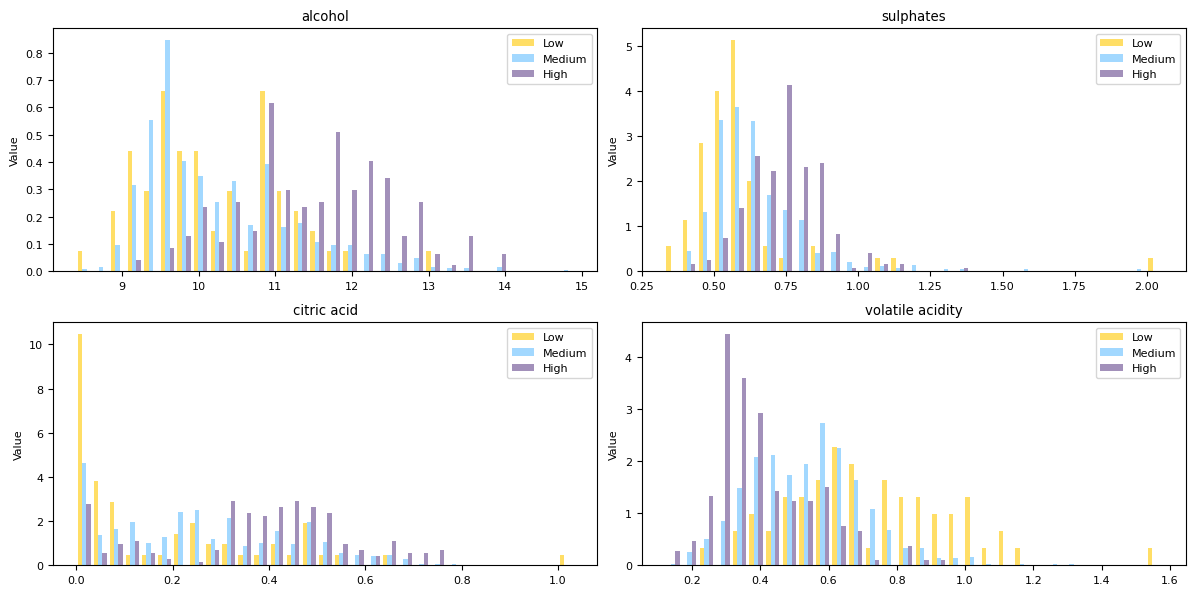

<IPython.core.display.Javascript object>

In [86]:
features = ["alcohol", "sulphates", "citric acid", "volatile acidity"]
low = df_quality[df_quality["quality"] == "low"]
medium = df_quality[df_quality["quality"] == "medium"]
high = df_quality[df_quality["quality"] == "high"]
plt.rcParams.update({"font.size": 8})
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax = ax.flatten()
for i, plot in enumerate(ax):
    plot.figure
    binwidth = (max(df_quality[features[i]]) - min(df_quality[features[i]])) / 30
    bins = np.arange(
        min(df[features[i]]), max(df_quality[features[i]]) + binwidth, binwidth
    )
    plot.hist(
        [low[features[i]], medium[features[i]], high[features[i]]],
        bins=bins,
        alpha=0.6,
        density=True,
        label=["Low", "Medium", "High"],
        color=["#FFC900", "#64BEFF", "#64468C"],
    )

    plot.legend(loc="upper right")
    plot.set_title(features[i])
    plot.set_ylabel("Value")
plt.tight_layout()
plt.show()

As we can see in the histograms, higher values of alcohol, sulphates and citric acid seem to belong to higher quality rated wines while higher values of volatile acidity are present in lower rated wines.

## 3. ML modeling

### Apply linear machine learning models to predict the quality column using the other 11 features. 

* To achieve better performance features 'residual sugar', 'free sulfur dioxide' were excluded from Linear Regression model.

In [99]:
X = df[
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "chlorides",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
    ]
]
Y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [100]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.3893961467314261
Mean Absolute Error: 0.5040262269361524
R-squared: 0.4041428379787798


<IPython.core.display.Javascript object>

In [101]:
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const)
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     74.30
Date:                Wed, 24 May 2023   Prob (F-statistic):          3.13e-110
Time:                        16:30:01   Log-Likelihood:                -1269.2
No. Observations:                1279   AIC:                             2558.
Df Residuals:                    1269   BIC:                             2610.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.1678 

<IPython.core.display.Javascript object>

* Lower values for Mean Squared Error (MSE) and Mean Absolute Error (MAE) indicate better performance, while a higher value of R-squared indicates a better fit of the model to the data.
* The R-squared value of 0.4031 suggests that the model explains only about 40.31% of the variance in the target variable.
* Using PowerTransformer (make data more Gaussian-like) performance increases:

In [102]:
pt = PowerTransformer(method="yeo-johnson")
X_transformed = pt.fit_transform(X)
X = X_transformed
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.38847892928069294
Mean Absolute Error: 0.49757567532855856
R-squared: 0.4055463716083182


<IPython.core.display.Javascript object>

In [103]:
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const)
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     77.15
Date:                Wed, 24 May 2023   Prob (F-statistic):          8.23e-114
Time:                        16:30:16   Log-Likelihood:                -1260.8
No. Observations:                1279   AIC:                             2542.
Df Residuals:                    1269   BIC:                             2593.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6278      0.018    308.980      0.0

<IPython.core.display.Javascript object>

* The R-squared is 0.345, meaning that approximately 34.5% of the variability in the quality can be explained by the model. 
* The F-statistic is 77.15 and the associated p-value is very small (8.23e-114), indicating that the model is statistically significant.
* Coefficients provide information about the direction and magnitude of their effect on the quality.  For example, "volatile acidity" has a coefficient of -0.1796, indicating that an increase in volatile acidity leads to a decrease in quality ratings by approximately 0.1796 units

### LogisticRegression

In [104]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Model accuracy: ", np.round(accuracy_score(y_test, y_pred), 2))
print(classification_report(y_test, y_pred))

Model accuracy:  0.57
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.74      0.68       130
           6       0.52      0.58      0.55       132
           7       0.43      0.24      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.27      0.26      0.26       320
weighted avg       0.53      0.57      0.54       320



<IPython.core.display.Javascript object>

* Precision: Precision represents the ability of the model to correctly identify positive instances out of all the instances it predicted as positive. In this case, the precision is low for most classes, with values ranging from 0.00 to 0.63. This suggests that the model struggles to accurately identify true positive instances.

* Recall: Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances out of all the actual positive instances. The recall values range from 0.00 to 0.74, indicating that the model has varying success in capturing true positive instances across different classes.

* F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both precision and recall. The F1-scores range from 0.00 to 0.68, indicating moderate performance for classifying the different quality levels.

* The support column indicates the number of instances in each class.

* The macro avg and weighted avg provide average performance measures across all classes. In this case, both macro avg and weighted avg show relatively low scores for precision, recall, and F1-score.

* Overall, the interpretation suggests that the logistic regression model's performance is suboptimal. It struggles to accurately classify instances, particularly in the minority classes. Further analysis, model tuning, or exploration of other classification algorithms may be necessary to improve the model's performance.

### RandomForest model

In [105]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Model accuracy: ", np.round(accuracy_score(y_test, rfc_pred), 2))
print(classification_report(y_test, rfc_pred))

Model accuracy:  0.67
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.77      0.74       130
           6       0.63      0.71      0.67       132
           7       0.65      0.48      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.67       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.64      0.67      0.65       320



<IPython.core.display.Javascript object>

* Conclusion:
    Of all the models selected, the Random Forest model showed the best accuracy in predicting the wine quality rating: 67% accuracy

### Apply linear machine learning models to predict the alcohol column using the other 11 features.

In [106]:
X = df.drop("alcohol", axis=1)
Y = df["alcohol"]

<IPython.core.display.Javascript object>

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [108]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.3450566717849909
Mean Absolute Error: 0.4514274482242954
R-squared: 0.7228300454815487


<IPython.core.display.Javascript object>

In [109]:
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const)
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     246.6
Date:                Wed, 24 May 2023   Prob (F-statistic):          1.85e-305
Time:                        16:35:37   Log-Likelihood:                -1148.1
No. Observations:                1279   AIC:                             2320.
Df Residuals:                    1267   BIC:                             2382.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  549.9910 

<IPython.core.display.Javascript object>

In [110]:
pt = PowerTransformer(method="yeo-johnson")
X_transformed = pt.fit_transform(X)
X = X_transformed
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.38480831488815803
Mean Absolute Error: 0.4717746664346144
R-squared: 0.6908991714777446


<IPython.core.display.Javascript object>

In [111]:
correlations_subset = df.corr()["alcohol"].sort_values(ascending=False)
print(correlations_subset)

alcohol                 1.000000
quality                 0.476166
pH                      0.205633
citric acid             0.109903
sulphates               0.093595
residual sugar          0.042075
fixed acidity          -0.061668
free sulfur dioxide    -0.069408
volatile acidity       -0.202288
total sulfur dioxide   -0.205654
chlorides              -0.221141
density                -0.496180
Name: alcohol, dtype: float64


<IPython.core.display.Javascript object>

* The F-statistic tests the overall significance of the model. A significant F-statistic (with a small p-value) suggests that the model is statistically significant. Here, the F-statistic and the associated p-value is very small (1.85e-305), indicating that the model is highly statistically significant.
* The R-squared is meaning that approximately 68.2% of the variability in the alcohol content can be explained by the model. 
* The Skew value indicates a slight departure from a symmetric distribution, and the Kurtosis value suggests slightly heavy tails compared to a normal distribution.

### 4. Conclusions:
    

* The available data table is not large, so a data transformation was necessary to analyse and use the data.
* From the available data we can conclude that the vast majority of wines are in the medium quality rated class (ratings 5-6).
* The quality rating of the wine is determined by the alcohol content (highest correlation percentage).
* The hypothesis was that the alcohol content of a red wine average in quality ratings (5-6) is different than average alcohol quantity in quality ratings (7-8) and if different than how significant it is. We found that it is significantly differ so that the mean of alcohol quantity in 7-8 rated wine is -1.265 higher than 5-6 rated wine group. 
* With 95% confidence we can claim that best rated wine (7-8) alcohol level confidence intervals are (11.385; 11.651).  
* Sulphates and citric acid seem to belong to higher quality rated (7-8) wines while higher values of volatile acity are present in lower quality rated wines.


### 5. Improvements:

* Add further information on white wine and what characteristics determine its quality;
* It may be possible to improve the visualisation and depth of the analysis by extending the feature interactions;
* More in-depth study of ML is needed to develop more accurate models to predict the quality of the available wine with the available data.